In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Условие 1: Задача 1
Постройте график
Назовите график
Сделайте именование оси x и оси y
Сделайте выводы

In [3]:
df = pd.read_csv('kc_house_data.csv') #Скачать данные по ссылке
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 1.2 Изучите стоимости недвижимости

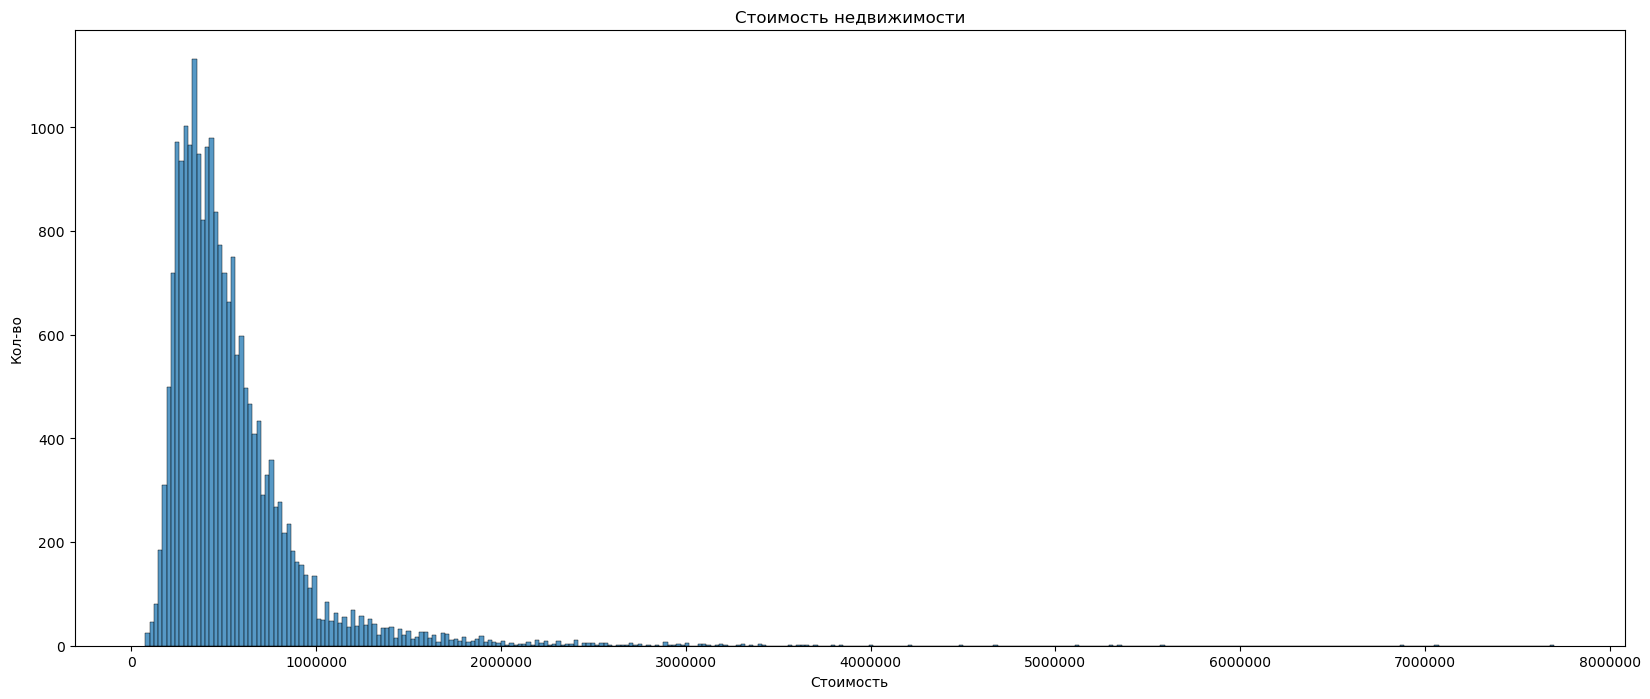

In [4]:
plt.figure(figsize=(20, 8))
sns.histplot(df['price'])
plt.ticklabel_format(style='plain')
plt.title('Стоимость недвижимости')
plt.xlabel('Стоимость')
plt.ylabel('Кол-во');

### 1.3 Изучите распределение квадратуры жилой

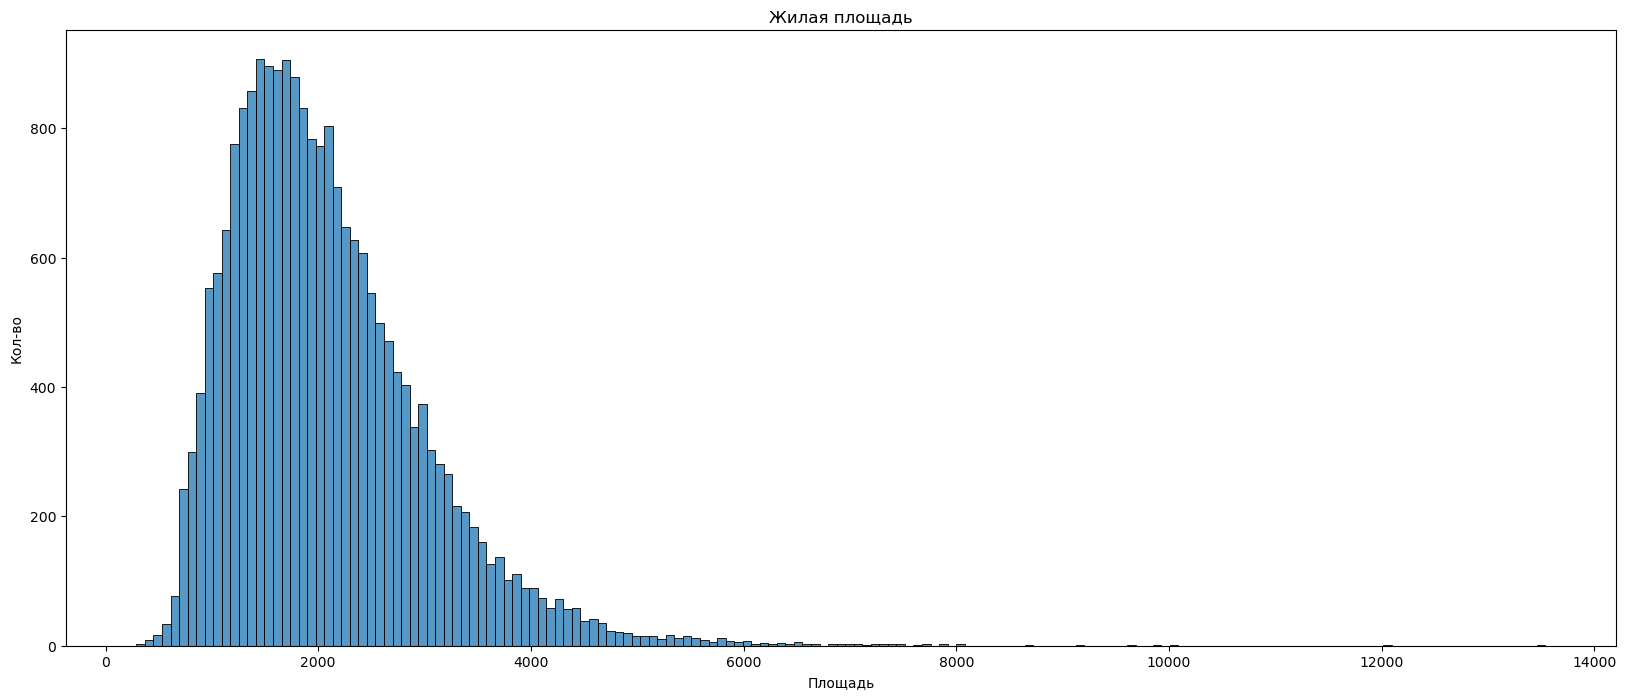

In [5]:
plt.figure(figsize=(20, 8))
sns.histplot(df['sqft_living'])
plt.ticklabel_format(style='plain')
plt.title('Жилая площадь')
plt.xlabel('Площадь')
plt.ylabel('Кол-во');

### 1.4 Изучите распределение года постройки

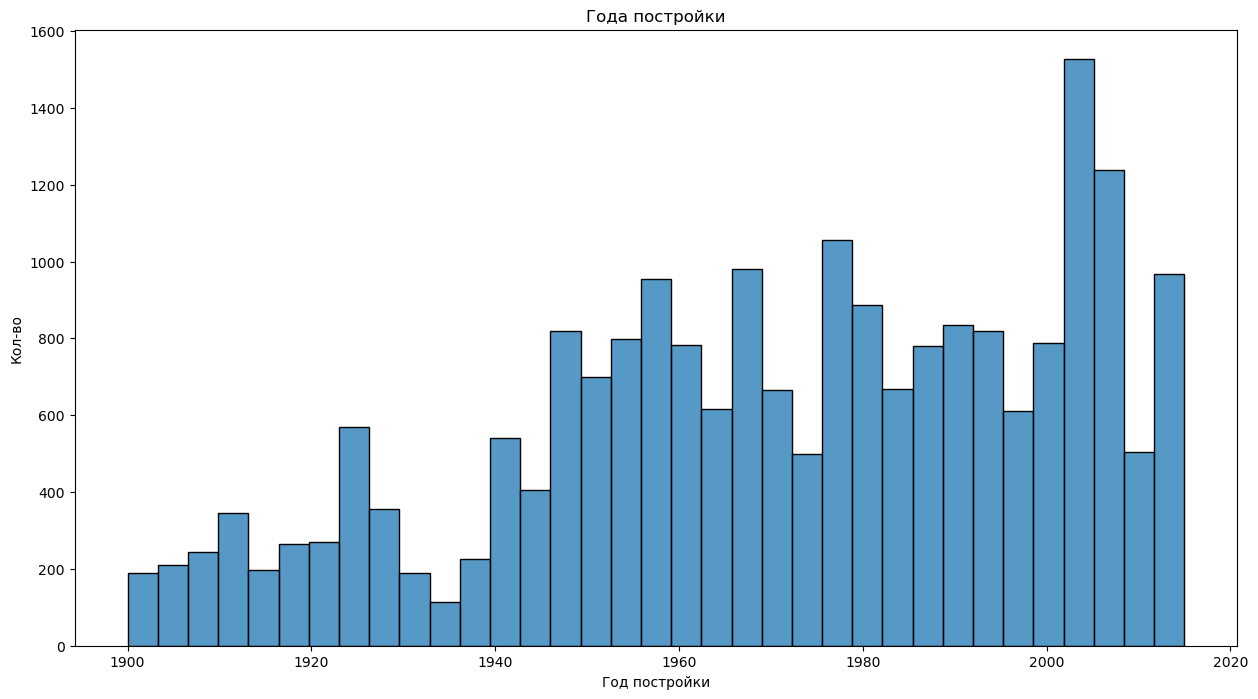

In [6]:
plt.figure(figsize=(15, 8))
sns.histplot(df['yr_built'])
plt.ticklabel_format(style='plain')
plt.title('Года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Кол-во');

## Условие 2: 2 задача

### 2.1 Изучите распределение домов от наличия вида на набережную
Постройте график
Сделайте выводы

In [7]:
datawf = df['waterfront'].value_counts()
datawf

0    21450
1      163
Name: waterfront, dtype: int64

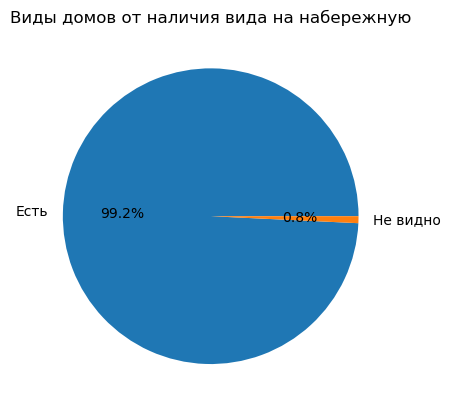

In [10]:
labels = ['Есть', 'Не видно']
plt.pie(datawf, autopct='%1.1f%%', labels=labels)
plt.title('Виды домов от наличия вида на набережную');

### 2.2 Изучите распределение этажей домов

In [11]:
datafl = df['floors'].value_counts()
datafl

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

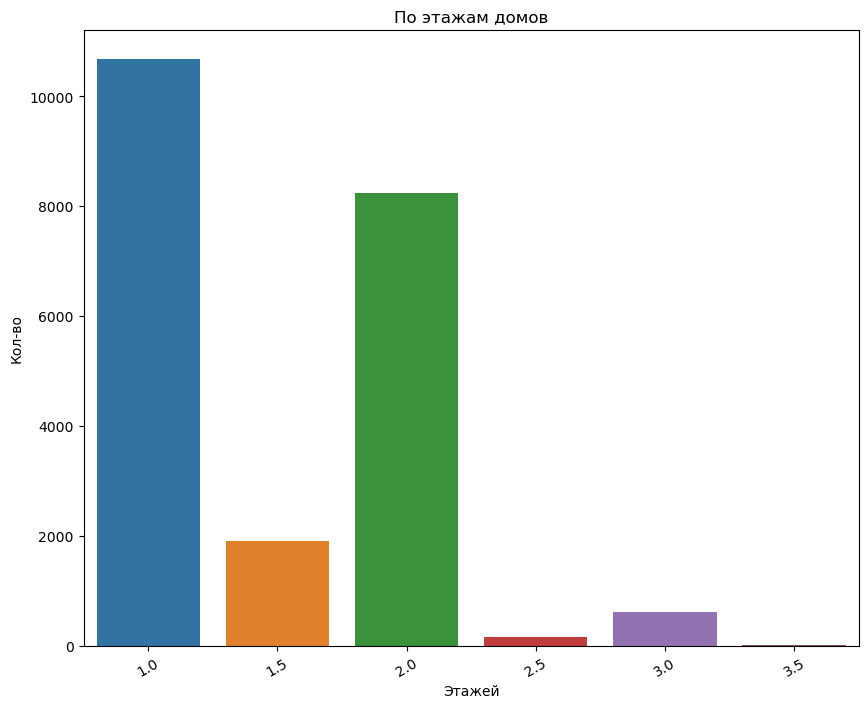

In [12]:
plt.figure(figsize=(10, 8))
sns.barplot(x = datafl.index, y = datafl)
plt.title('По этажам домов')
plt.xlabel('Этажей')
plt.ylabel('Кол-во')
plt.xticks(rotation=30);

### 2.2 Изучите распределение состояния домов

In [13]:
datacond = df['condition'].value_counts()
datacond

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

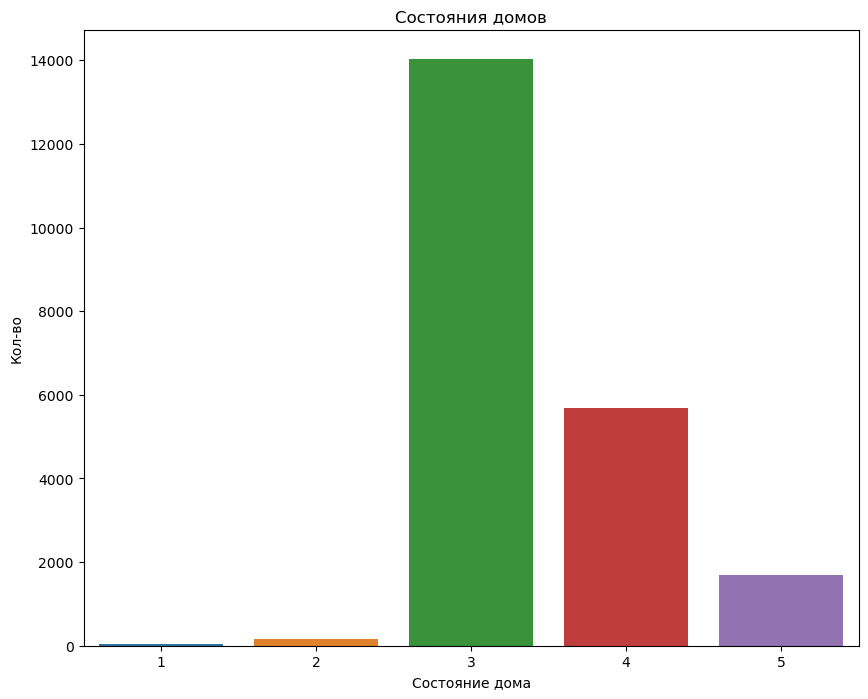

In [14]:
plt.figure(figsize=(10, 8))
sns.barplot(x = datacond.index, y = datacond)
plt.title('Состояния домов')
plt.xlabel('Состояние дома')
plt.ylabel('Кол-во');

## Условие 3:
### 3 задача
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока. Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

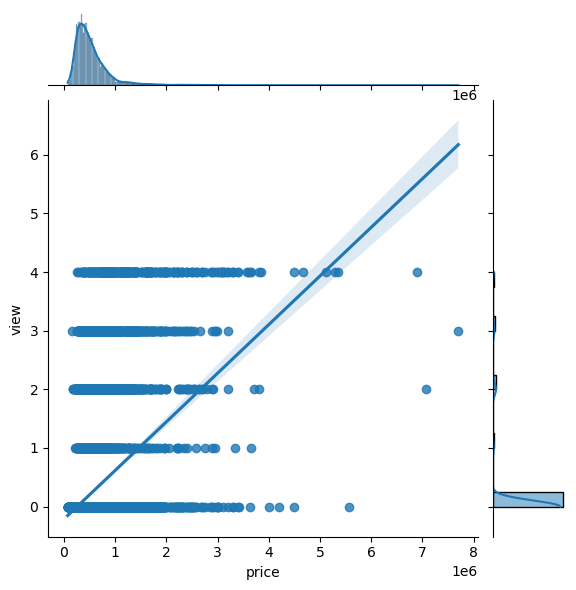

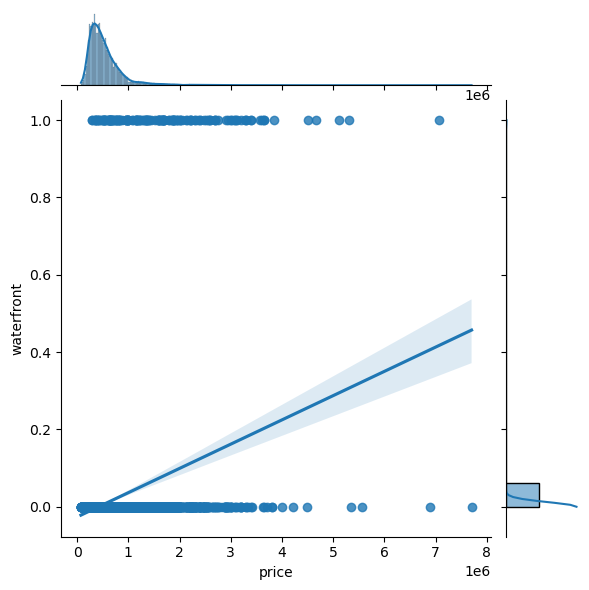

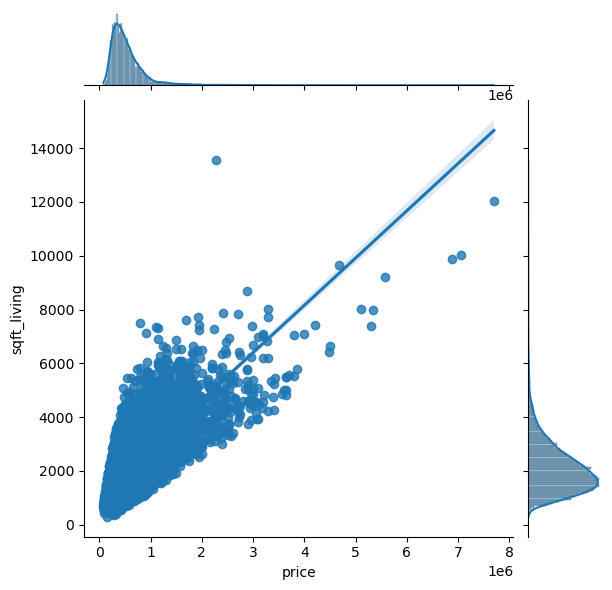

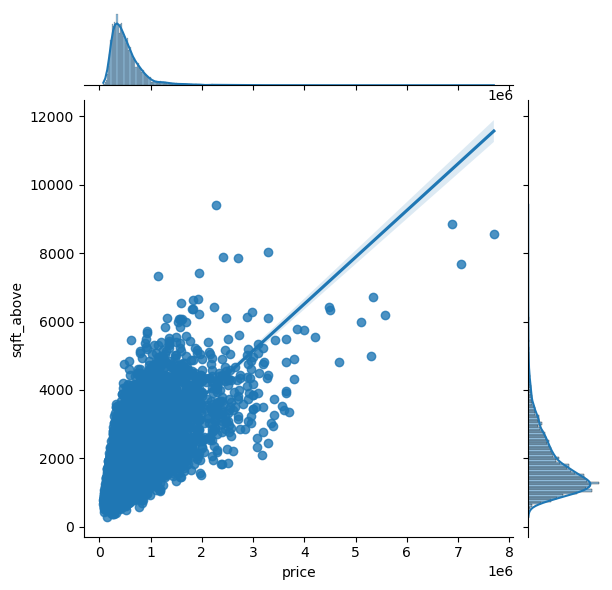

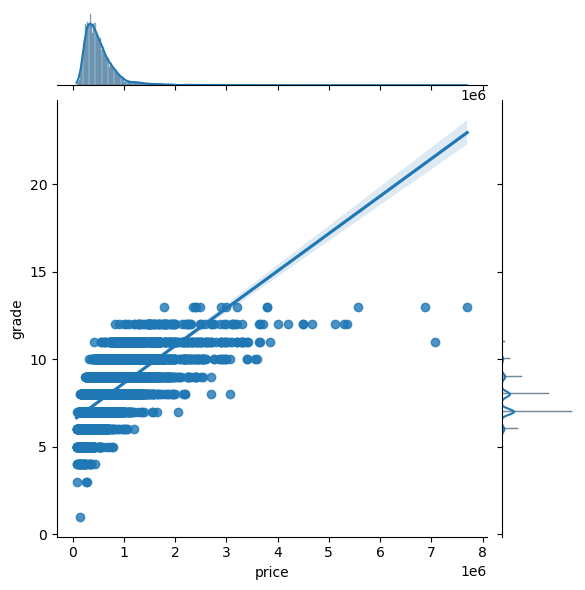

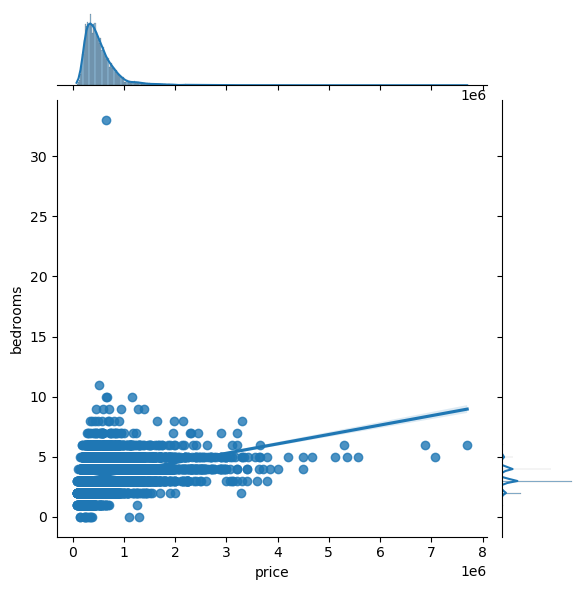

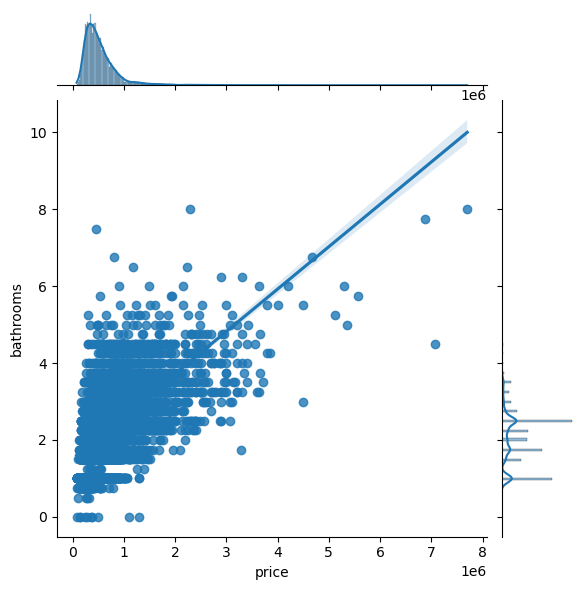

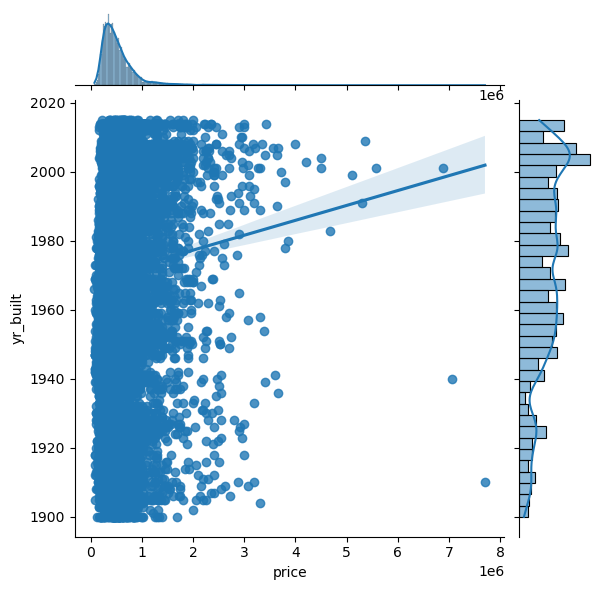

In [20]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
sns.jointplot(x=df['price'], y=df['view'], kind='reg') 
sns.jointplot(x=df['price'], y=df['waterfront'], kind='reg') 
sns.jointplot(x=df['price'], y=df['sqft_living'], kind='reg') 
sns.jointplot(x=df['price'], y=df['sqft_above'], kind='reg')
sns.jointplot(x=df['price'], y=df['grade'], kind='reg')
sns.jointplot(x=df['price'], y=df['bedrooms'], kind='reg')
sns.jointplot(x=df['price'], y=df['bathrooms'], kind='reg')
sns.jointplot(x=df['price'], y=df['yr_built'], kind='reg');

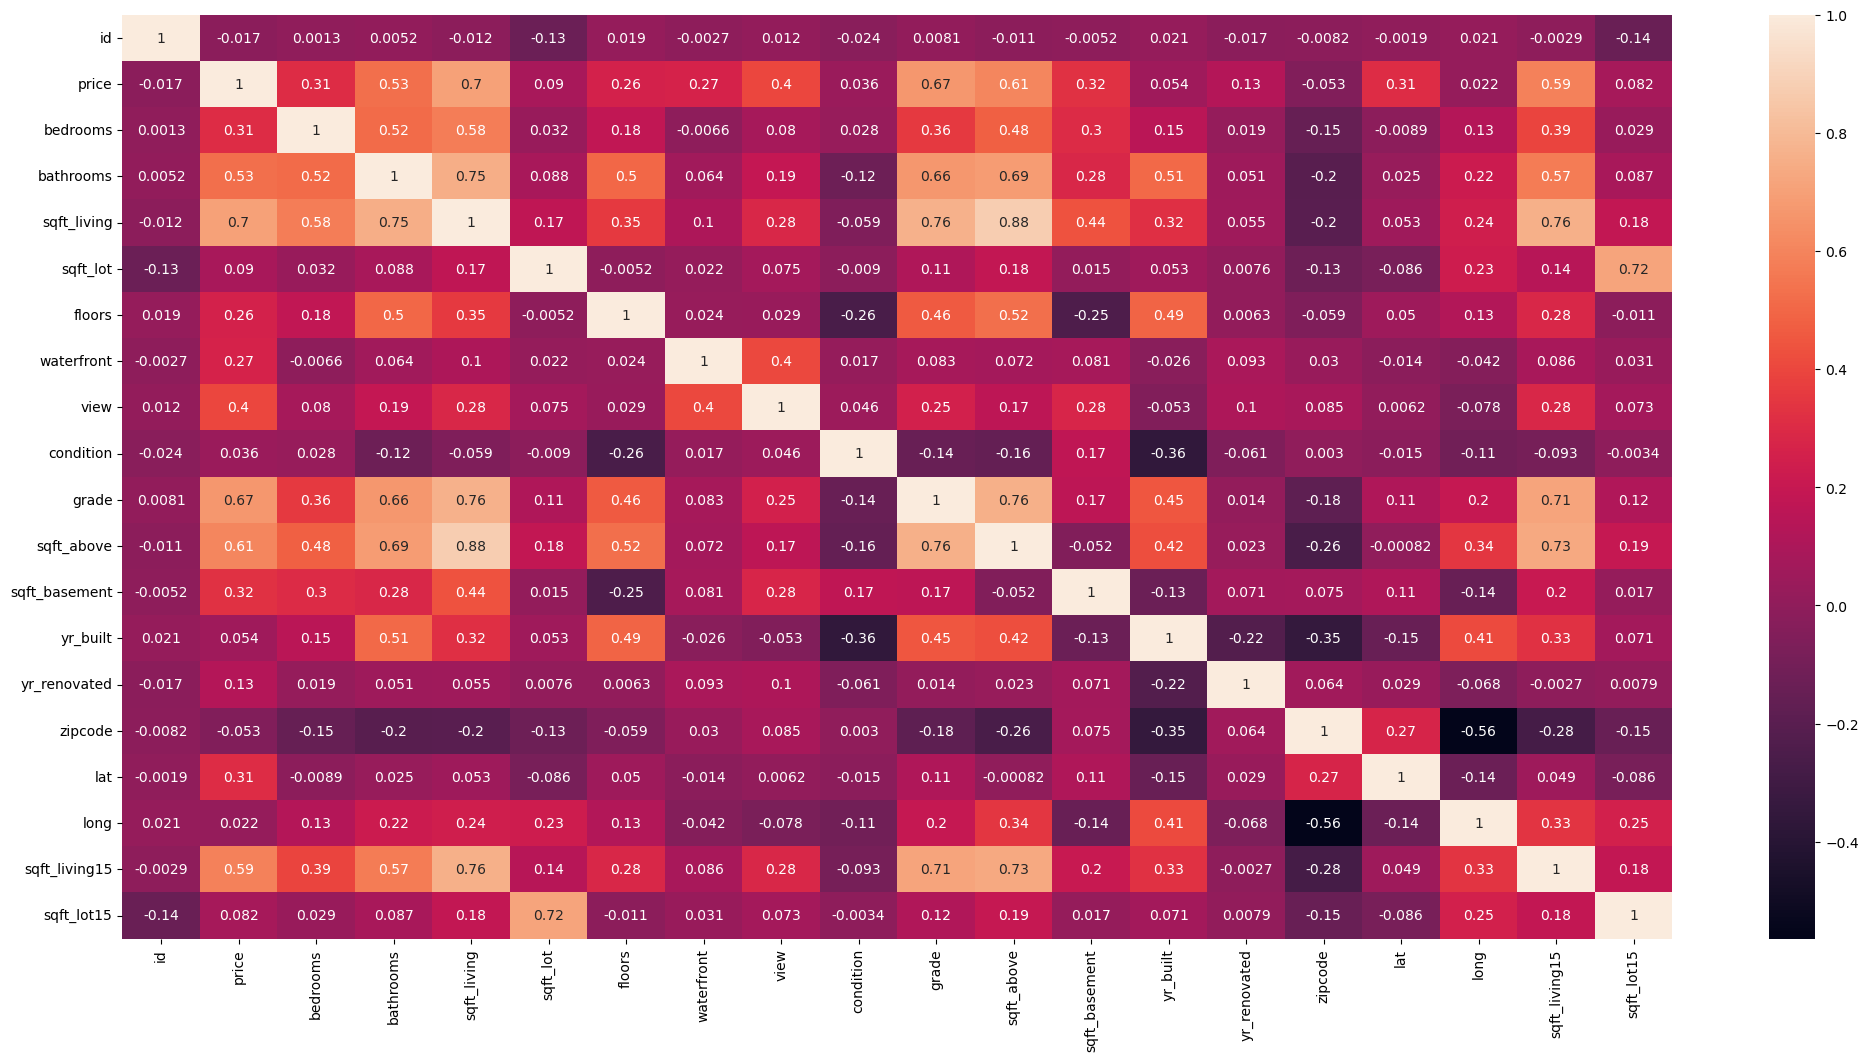

In [21]:
plt.figure(figsize=(25,12))
df_corr = df.corr()
sns.heatmap(df_corr, annot = True)
print()

In [ ]:
грейд жилья часто зависит от наличия второго этажа и жил площади соседей ( зависит цена)
все параметры площади жилья также способствуют цене
число ванн влияет более чем число спален
число этажей по оценке примерно равнозначно водопаду как и фактору наличия подвала
год реновации слабо влияет еще менее влияет дата постройки

есть зависимость между ценой: жилой площадью и жилой площади второго этажа, качеством жилья, числа ванн,
слабо зависит от состояния. немного более но все же слабая зависимость от года основания 
вид число этажней и спален водопад жилая пл соседей является средним фактором    
    